In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

In [2]:
# Load the dataset
df = pd.read_csv('AirlineData.csv')


In [3]:
df.head()

,Airline,Source,Destination,Number of Stops,Class,Date,Total_Stopover_Time,price in CAD,days_left,Departure_24hr,Arrival_24hr,Arrival_Day_Offset
0,Etihad Airways,Toronto Pearson Intl,Bengaluru Intl,1,Economy Class,2024-06-02,130,2340.0,1,22:10,03:05,2
1,Delta,Toronto Pearson Intl,Bengaluru Intl,1,Economy Class,2024-06-02,1335,1347.0,1,22:40,23:15,2
2,Multiple Airlines,Toronto Pearson Intl,Bengaluru Intl,2,Economy Class,2024-06-02,420,1934.0,1,21:20,07:45,2
3,Multiple Airlines,Toronto Pearson Intl,Bengaluru Intl,2,Economy Class,2024-06-02,380,2291.0,1,21:20,06:50,2
4,Multiple Airlines,Toronto Pearson Intl,Bengaluru Intl,2,Economy Class,2024-06-02,175,2661.0,1,23:40,06:25,2


In [4]:
df.describe()

,Number of Stops,Total_Stopover_Time,price in CAD,days_left,Arrival_Day_Offset
count,384663.000000,384663.000000,384663.000000,384663.000000,384663.000000
mean,1.752069,427.273003,3289.519104,26.192459,1.257030
std,0.593852,228.622875,2107.279540,14.491024,0.713665
min,0.000000,0.000000,261.000000,1.000000,0.000000
25%,1.000000,256.000000,1875.000000,13.000000,1.000000
50%,2.000000,395.000000,2742.000000,26.000000,1.000000
75%,2.000000,575.000000,4547.000000,39.000000,2.000000
max,3.000000,5455.000000,26418.000000,53.000000,5.000000


In [5]:
df.dtypes

Airline                 object
Source                  object
Destination             object
Number of Stops          int64
Class                   object
Date                    object
Total_Stopover_Time      int64
price in CAD           float64
days_left                int64
Departure_24hr          object
Arrival_24hr            object
Arrival_Day_Offset       int64
dtype: object

In [6]:
# Check for missing values
df.isnull().sum()

Airline                0
Source                 0
Destination            0
Number of Stops        0
Class                  0
Date                   0
Total_Stopover_Time    0
price in CAD           0
days_left              0
Departure_24hr         0
Arrival_24hr           0
Arrival_Day_Offset     0
dtype: int64

In [7]:
# Convert Date to datetime
df['Date'] = pd.to_datetime(df['Date'])

In [8]:
# Create time-based features
df['Month'] = df['Date'].dt.month
df['Day_of_Week'] = df['Date'].dt.dayofweek

# Convert Departure_24hr and Arrival_24hr to minutes since midnight
def time_to_minutes(time_str):
    hours, minutes = map(int, time_str.split(':'))
    return hours * 60 + minutes

df['Departure_Minutes'] = df['Departure_24hr'].apply(time_to_minutes)
df['Arrival_Minutes'] = df['Arrival_24hr'].apply(time_to_minutes)

# Encode categorical variables
le = LabelEncoder()
categorical_columns = ['Airline', 'Source', 'Destination', 'Class']
for col in categorical_columns:
    df[col + '_Encoded'] = le.fit_transform(df[col])

# Drop original categorical columns and date column
df = df.drop(columns=['Airline', 'Source', 'Destination', 'Class', 'Date', 'Departure_24hr', 'Arrival_24hr'])

In [9]:
# Split the data into features (X) and target (y)
X = df.drop('price in CAD', axis=1)
y = df['price in CAD']

In [10]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [17]:
# Train the Random Forest Regressor model
rf_model = RandomForestRegressor(random_state=42)
rf_model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [12]:
# Train the Decision Tree Regressor model
dt_model = DecisionTreeRegressor(random_state=42)
dt_model.fit(X_train, y_train)

DecisionTreeRegressor(random_state=42)

In [13]:
# Make predictions on the test set
rf_predictions = rf_model.predict(X_test)
dt_predictions = dt_model.predict(X_test)

In [14]:
# Evaluate the models
rf_mse = mean_squared_error(y_test, rf_predictions)
rf_r2 = r2_score(y_test, rf_predictions)
dt_mse = mean_squared_error(y_test, dt_predictions)
dt_r2 = r2_score(y_test, dt_predictions)

In [15]:
# Print the evaluation metrics
print('Random Forest Regressor:')
print('MSE:', rf_mse)
print('R2 Score:', rf_r2)
print('\nDecision Tree Regressor:')
print('MSE:', dt_mse)
print('R2 Score:', dt_r2)

Random Forest Regressor:
MSE: 425759.69096070534
R2 Score: 0.9040874389243316

Decision Tree Regressor:
MSE: 600894.1441741311
R2 Score: 0.8646342114419847


In [ ]:
#Based on these results, we can conclude that the Random Forest Regressor performs better than the Decision Tree Regressor for this dataset. The Random Forest model has a lower Mean Squared Error (MSE) and a higher R-squared (R2) score, indicating better predictive performance and a better fit to the data.

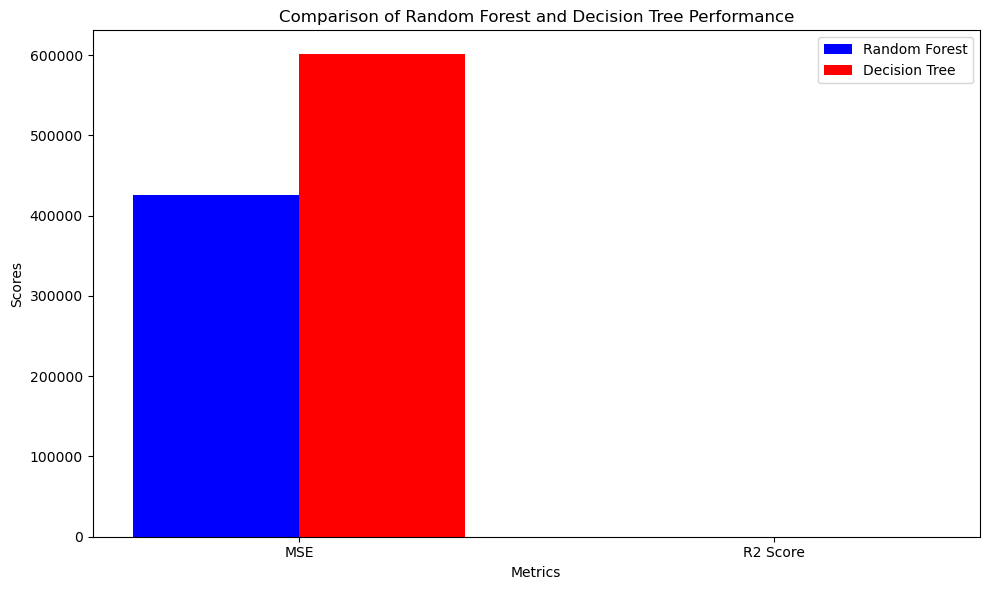

This bar plot compares the Mean Squared Error (MSE) and R2 Score for both the Random Forest and Decision Tree models. As we can see, the Random Forest model (in blue) outperforms the Decision Tree model (in green) on both metrics. It has a lower MSE and a higher R2 Score, confirming our earlier conclusion that the Random Forest model is more accurate for this dataset.


In [35]:
# Create a bar plot to compare MSE and R2 scores
metrics = ['MSE', 'R2 Score']
rf_scores = [rf_mse, rf_r2]
dt_scores = [dt_mse, dt_r2]

plt.figure(figsize=(10, 6))
x = range(len(metrics))
width = 0.35

plt.bar([i - width/2 for i in x], rf_scores, width, label='Random Forest', color='blue')
plt.bar([i + width/2 for i in x], dt_scores, width, label='Decision Tree', color='red')

plt.xlabel('Metrics')
plt.ylabel('Scores')
plt.title('Comparison of Random Forest and Decision Tree Performance')
plt.xticks(x, metrics)
plt.legend()
plt.tight_layout()
plt.show()
print('This bar plot compares the Mean Squared Error (MSE) and R2 Score for both the Random Forest and Decision Tree models. As we can see, the Random Forest model (in blue) outperforms the Decision Tree model (in green) on both metrics. It has a lower MSE and a higher R2 Score, confirming our earlier conclusion that the Random Forest model is more accurate for this dataset.')
